![polarpng](polarplot_files/polarplot_31_1.png)
最終的にデータフレームからこんな極座標プロットを描けるようにします。
matplotlibを利用してのプロットはコードが煩雑になりやすいので、なるべくpandas.DataFrameのメソッドとして呼び出してコンパクトなコードでプロットできるようにします。

# モジュールインポート

In [191]:
import polar

使用するコードはこれだけです。

```python:polar.py
#!/usr/bin/env python
"""polar plot functions"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def _polarplot(df, **kwargs):
    """polar plot
    usage: df.polarplot()
    Same args with `df.plot()`
    """
    _df = df.copy()
    _df.index = _df.index * np.pi / 180  # Convert radian
    ax = plt.subplot(111, projection='polar')  # Polar plot
    ax = _df.plot(ax=ax, **kwargs)
    return ax


def _mirror(df, ccw=True):
    """Make a mirror copy of DataFrame with respect to the line
    usage:
        df.mirror(ccw=True)...data increase to Counter Clock Wise(ccw)
        df.mirror(ccw=False)...data increase to Clock Wise(cw)
    args: ccw(bool) default True
    return: pandas.Series or pandas.DataFrame
    """
    copy_index = df.index
    if ccw:  # data increase to Counter Clock Wise(ccw)
        mirror_df = df.append(df.iloc[-2::-1], ignore_index=True)
        new_index = np.r_[copy_index, copy_index[1:] + copy_index[-1]]
    else:  # data increase to Clock Wise(cw)
        mirror_df = df.iloc[::-1].append(df.iloc[1:], ignore_index=True)
        new_index = np.r_[copy_index[::-1], -copy_index[1:]]
    mirror_df.index = new_index  # reset index
    return mirror_df


# Use as pandas methods
for cls in (pd.DataFrame, pd.Series):
    setattr(cls, 'mirror', _mirror)
    setattr(cls, 'polarplot', _polarplot)
```

# Seriesで極座標プロット

## サンプルデータ
10°刻みで0°から90°までランダムな値が入ったデータを用意します。
以下では断りがない限り、indexの単位はすべて度数法に準じた"°(度)"です。

In [192]:
np.random.seed(6)  # ランダムステート固定
index = range(0,190,10)
sr = pd.Series(np.random.randn(len(index)), index=index); sr

0     -0.311784
10     0.729004
20     0.217821
30    -0.899092
40    -2.486781
50     0.913252
60     1.127064
70    -1.514093
80     1.639291
90    -0.429894
100    2.631281
110    0.601822
120   -0.335882
130    1.237738
140    0.111128
150    0.129151
160    0.076128
170   -0.155128
180    0.634225
dtype: float64

## 極座標プロット
`polarplot()`メソッドでサンプルデータを極座標にプロットします。
`polar.py`をインポートしてしまえば、`pandas.Series`, `pandas.DataFrame`型から`polarplot()`メソッドが使えるようになっています。

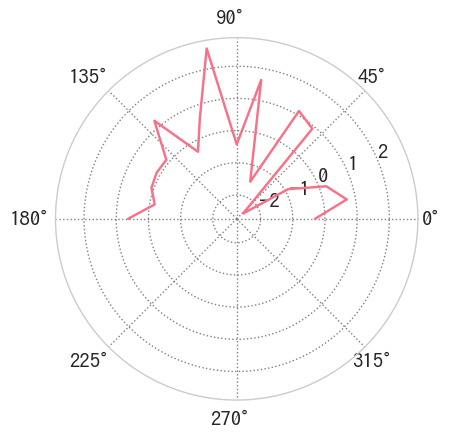

In [193]:
sr.polarplot()

```python:polarplot.py
def _polarplot(df, **kwargs):
    _df = df.copy()
    _df.index = _df.index * np.pi / 180  # Convert radian
    ax = plt.subplot(111, projection='polar')  # Polar plot
    ax = _df.plot(ax=ax, **kwargs)
    return ax
```

`polarplot()`メソッドは引数にデータフレーム(またはシリーズ)を要求して、戻り値はグラフaxです。
`**kwargs`引数で、`df.plot()`と同じ引数が使えます。

pandasのメソッドとして使えるように、ファイルの一番下で`setattr(pd.DataFrame, 'polarplot', _polarplot)`としてあるので、`df.polarplot()`として呼び出せます。

`pd.DataFrame.polarplot = _polarplot`とすることと同じです。自作の関数を既存クラスのメソッドとして扱えるようにする私の常套手段です。

## 鏡像データを作成
`mirror()`メソッドで、鏡像データを作り出します。

データの中身は次に示すように360°方向に増えます。

In [194]:
sr.mirror()

0     -0.311784
10     0.729004
20     0.217821
30    -0.899092
40    -2.486781
50     0.913252
60     1.127064
70    -1.514093
80     1.639291
90    -0.429894
100    2.631281
110    0.601822
120   -0.335882
130    1.237738
140    0.111128
150    0.129151
160    0.076128
170   -0.155128
180    0.634225
190   -0.155128
200    0.076128
210    0.129151
220    0.111128
230    1.237738
240   -0.335882
250    0.601822
260    2.631281
270   -0.429894
280    1.639291
290   -1.514093
300    1.127064
310    0.913252
320   -2.486781
330   -0.899092
340    0.217821
350    0.729004
360   -0.311784
dtype: float64

```python:mirror.py
def _mirror(df, ccw=True):
    copy_index = df.index
    if ccw:  # data increase to Counter Clock Wise(ccw)
        mirror_df = df.append(df.iloc[-2::-1], ignore_index=True)
        new_index = np.r_[copy_index, copy_index[1:] + copy_index[-1]]
    else:  # data increase to Clock Wise(cw)
        mirror_df = df.iloc[::-1].append(df.iloc[1:], ignore_index=True)
        new_index = np.r_[copy_index[::-1], -copy_index[1:]]
    mirror_df.index = new_index  # reset index
    return mirror_df
```

引数無し、または`ccw=True`で`mirror()`メソッドを呼ぶと、反時計回りにデータをコピーして、インデックスを振り直します。
引数`ccw=False`で`mirror()`メソッドを呼ぶと、時計回りにデータをコピーして、インデックスを振り直します。

mirror化したシリーズをプロットします。

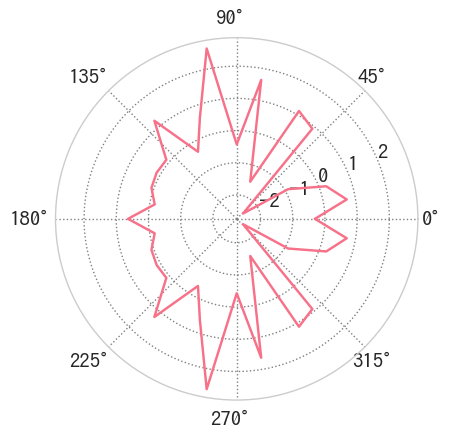

In [195]:
sr.mirror().polarplot()

# DataFrameで極座標プロット

## sin波サンプルデータ
次に、DataFrame型で極座標プロットを行います。
sin波を$\pi$/2だけとったサンプルデータを作成します。

SeriesだろうがDataFrameだろうが使い方は同じです。

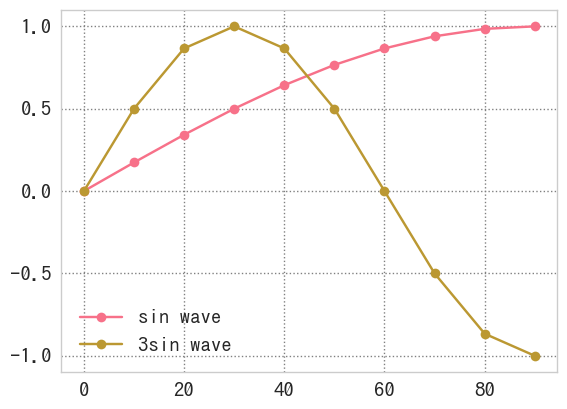

In [196]:
index = np.arange(0,100,10)
df = pd.DataFrame({'sin wave':np.sin(index*np.pi/180),
                   '3sin wave':np.sin(3*index*np.pi/180)}, index=index)
df.plot(style='o-')

## polarplotの引数指定

極座標プロットするために`polarplot()`メソッドを使用します。
`polarplot()`メソッドの引数には`df.plot(**kwargs)`として使えるほぼすべての引数が使えます。

例えば以下のようにして`style`や`ms`を指定してあげると、線種を変えたり、marker sizeを変更してくれます。

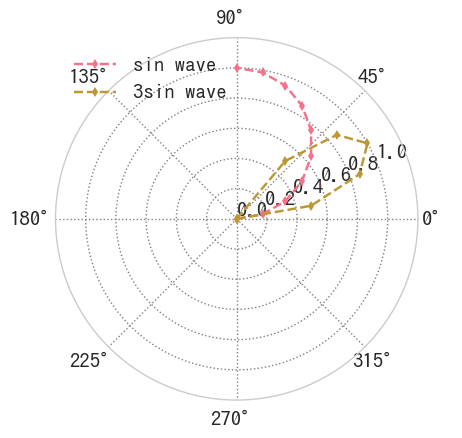

In [197]:
df.polarplot(style='d--', ms=5, ylim=[0,1.2], yticks=np.arange(0,1.2,.2))

## ミラー化(CCW=反時計回り)
デフォルトでは、`mirror()`メソッドは反時計回りに鏡像を作成します。

In [198]:
df.mirror()

,sin wave,3sin wave
0,0.000000,0.000000e+00
10,0.173648,5.000000e-01
20,0.342020,8.660254e-01
30,0.500000,1.000000e+00
40,0.642788,8.660254e-01
50,0.766044,5.000000e-01
60,0.866025,1.224647e-16
70,0.939693,-5.000000e-01
80,0.984808,-8.660254e-01
90,1.000000,-1.000000e+00


デカルト座標系にプロットするとこんな感じです。

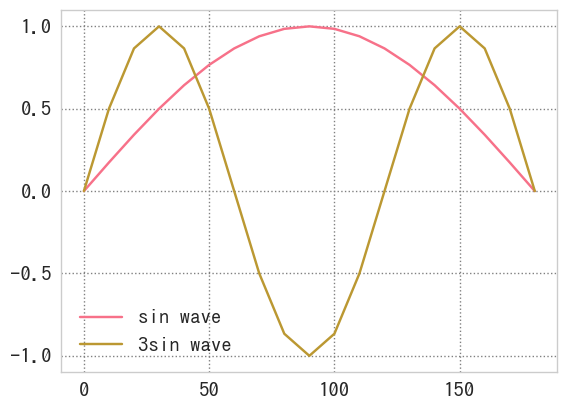

In [199]:
df.mirror().plot()

極座標プロットでは判例が間違いなくグラフの円の中に含まれて重なって見づらいので、凡例を外側に置くように`plt.legend()`で凡例の位置を指定したほうが良いです。

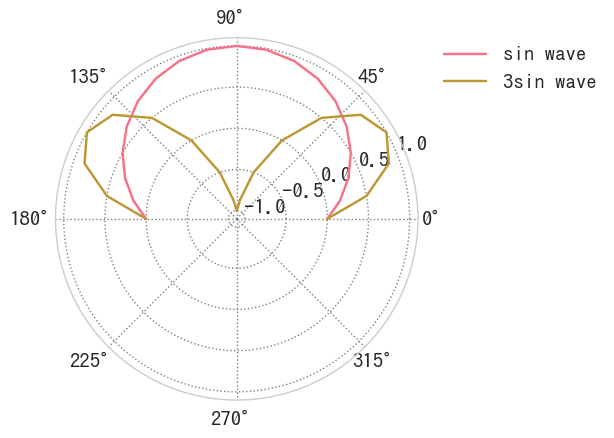

In [200]:
df.mirror().polarplot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)  # 凡例外側

1周(360度)までデータを拡張するには`mirror()`メソッドを2回続けて打って下さい。

In [201]:
df.mirror().mirror()

,sin wave,3sin wave
0,0.000000,0.000000e+00
10,0.173648,5.000000e-01
20,0.342020,8.660254e-01
30,0.500000,1.000000e+00
40,0.642788,8.660254e-01
50,0.766044,5.000000e-01
60,0.866025,1.224647e-16
70,0.939693,-5.000000e-01
80,0.984808,-8.660254e-01
90,1.000000,-1.000000e+00


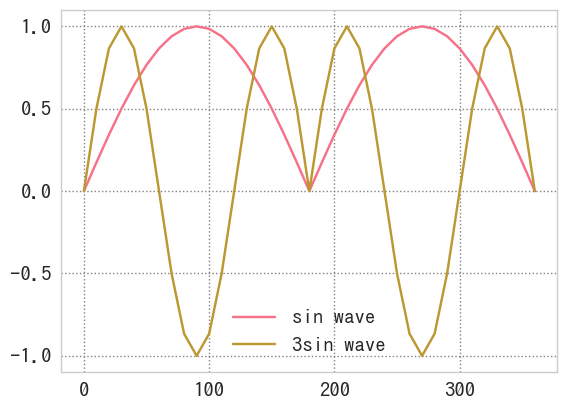

In [202]:
df.mirror().mirror().plot()

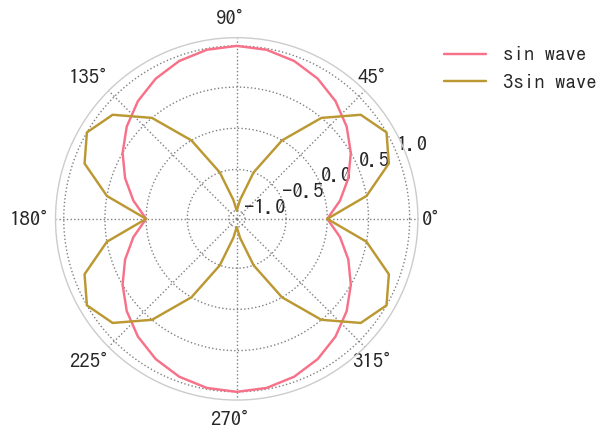

In [203]:
df.mirror().mirror().polarplot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)  # 凡例外側

## ミラー化(CW=時計回り)
`mirror()`メソッドの引数は`cw`(Counter Cloce Wise 反時計回り)のみで、デフォルトは`True`です。
`mirror(False)`のようにしてメソッドの引数を指定すると`cw`(Cloce Wise 時計回り)でデータを作成します。

In [204]:
df.mirror(False)

,sin wave,3sin wave
90,1.000000,-1.000000e+00
80,0.984808,-8.660254e-01
70,0.939693,-5.000000e-01
60,0.866025,1.224647e-16
50,0.766044,5.000000e-01
40,0.642788,8.660254e-01
30,0.500000,1.000000e+00
20,0.342020,8.660254e-01
10,0.173648,5.000000e-01
0,0.000000,0.000000e+00


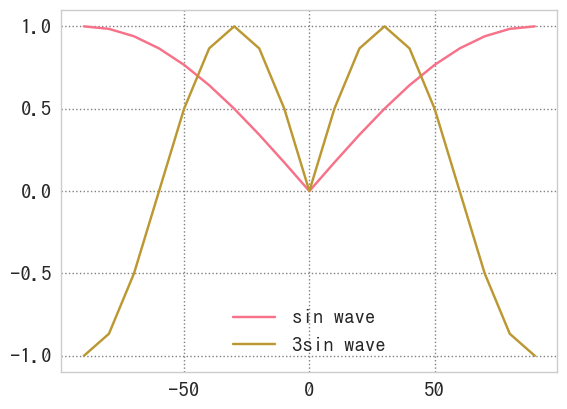

In [205]:
df.mirror(False).plot()

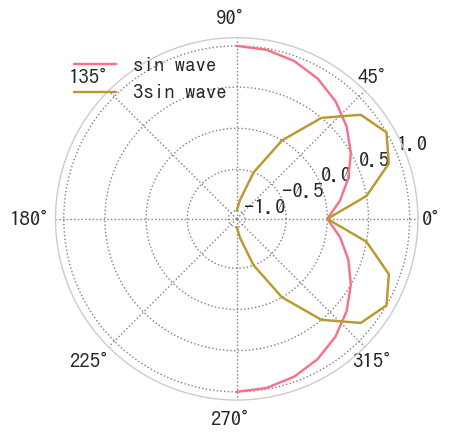

In [206]:
df.mirror(False).polarplot()

# まとめ
polar.pyの`polarplot()`メソッドによりデータフレームから極座標プロットをメソッドとして扱えるようになりました。また、`mirror()`メソッドにより線対称にデータを増やすことが可能になりました。

コードとjupyter notebookはgithubにあげました。
[u1and0/polarplot](https://github.com/u1and0/polarplot)